In [37]:
import matplotlib.pyplot as plt
from inception_time import *
from prepare_data import *
import pandas as pd
from Wav2Vec2.visualizations import * 
from sklearn.metrics import confusion_matrix


In [38]:
train_dir = './data/train2/audio/'

In [39]:
X_train, X_val, y_train, y_val = create_prepare_data(train_dir)

0 right/988e2f9a_nohash_0.wav


/Users/zuzannaglinka/DeepLearning/2024Z_DeepLearning/P2_Transformers_Speech_Classification/prepare_data.py:26: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


2000 right/7e843da8_nohash_0.wav
4000 eight/fa446c16_nohash_0.wav
6000 cat/b00c4c53_nohash_0.wav
8000 tree/617de221_nohash_0.wav
10000 happy/dd086776_nohash_0.wav
12000 go/5be23def_nohash_0.wav
14000 go/778a4a01_nohash_1.wav
16000 silence/frag47_exercise_bike.wav
18000 no/a8ee11c7_nohash_1.wav
20000 no/b9f46737_nohash_0.wav
22000 wow/cc592808_nohash_1.wav
24000 nine/5de8f2f0_nohash_3.wav
26000 left/3bc21161_nohash_4.wav
28000 stop/826268f8_nohash_0.wav
30000 three/d7ca14ef_nohash_0.wav
32000 sheila/e2286c18_nohash_0.wav
34000 one/73124b26_nohash_1.wav
36000 bird/5f1b1051_nohash_0.wav
38000 zero/36050ef3_nohash_0.wav
40000 seven/31d68957_nohash_2.wav
42000 seven/9a7c1f83_nohash_4.wav
44000 up/77def3ee_nohash_1.wav
46000 marvin/ad5aeec2_nohash_0.wav
48000 two/3d3ddaf8_nohash_2.wav
50000 house/7e843da8_nohash_2.wav
52000 down/cc6bae0d_nohash_0.wav
54000 six/fb2f3242_nohash_0.wav
56000 yes/079dfce3_nohash_0.wav
58000 on/c0e0f834_nohash_0.wav
60000 five/98582fee_nohash_0.wav
62000 five/dd6c

In [40]:
train_dir = "./data/train/audio/"
test_dir = './data/test/audio/'
training_list, test_list = create_datastes_lists(train_dir , test_dir )

In [43]:
classes, classes_index, NB_CLASSES = read_classes(train_dir)
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64
WEIGHTS_DIR = "./"
inception = InceptionTimeClassifier(WEIGHTS_DIR, INPUT_SHAPE, NB_CLASSES, 1, batch_size=BATCH_SIZE, build=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 122, 85)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 122, 32)              2720      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 122, 85)              0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 122, 32)              40960     ['conv1d[0][0]']          

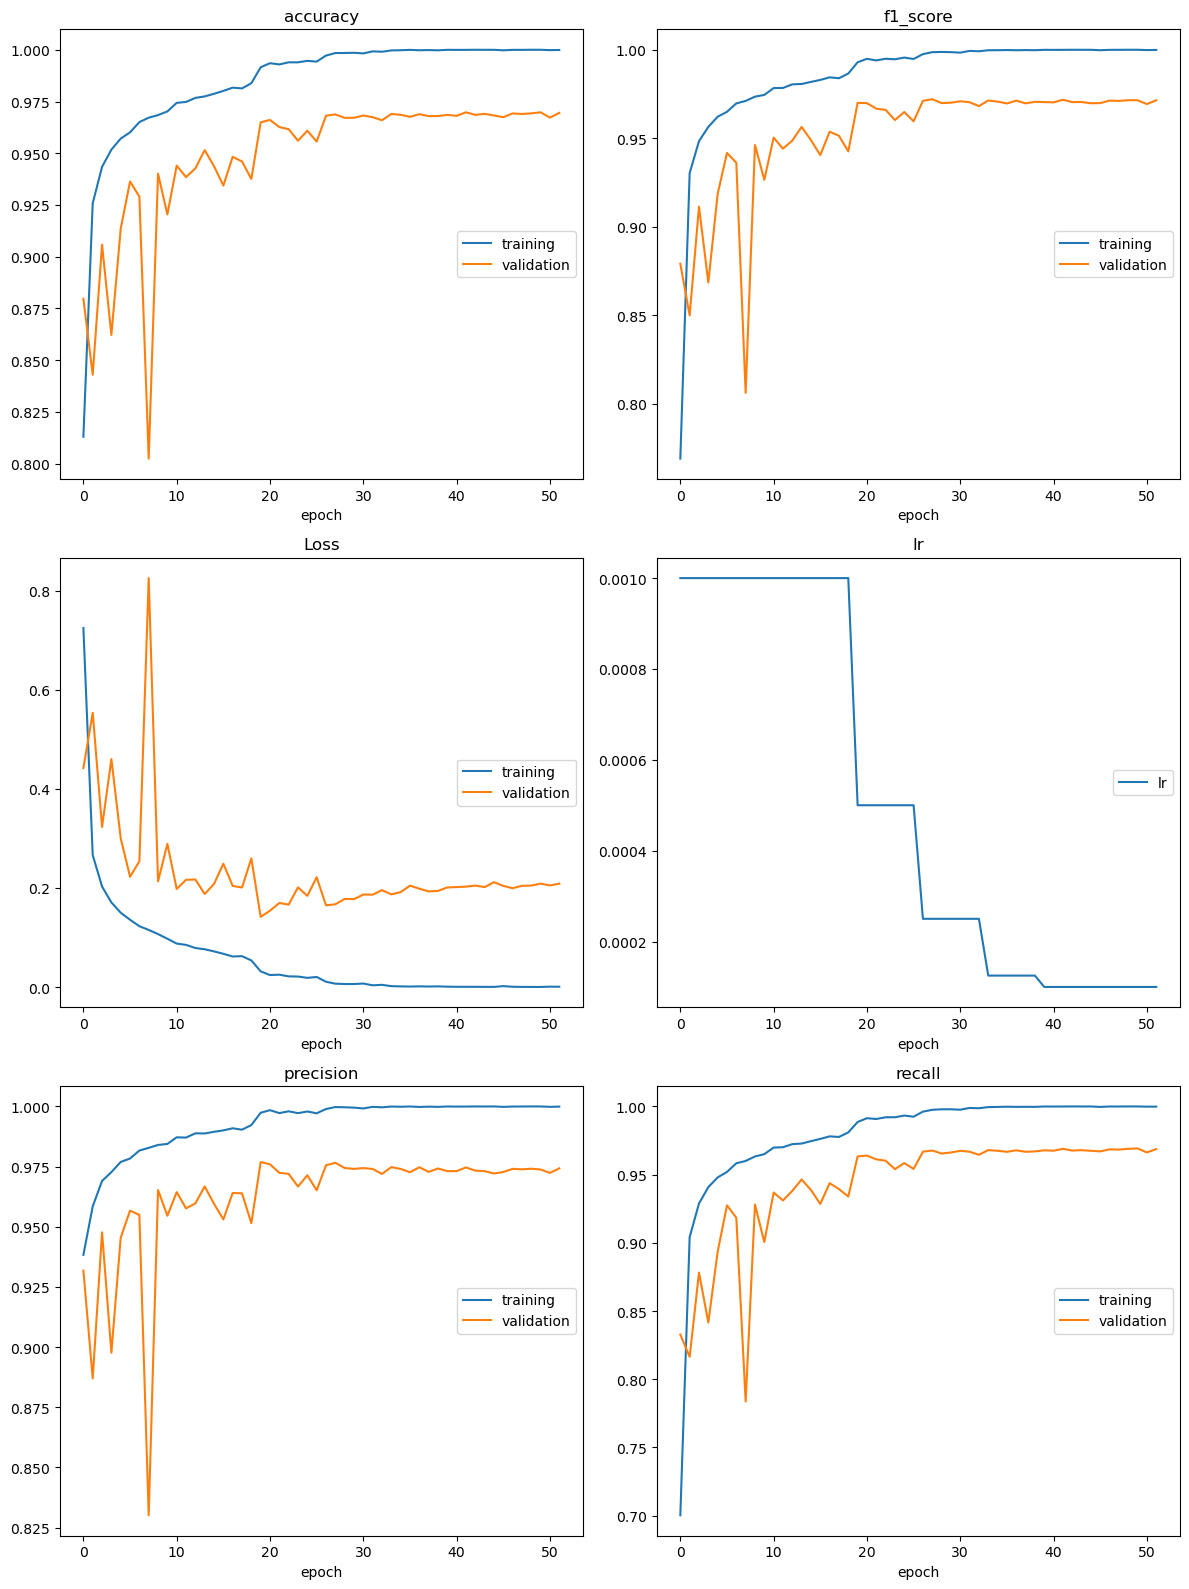

accuracy
	training         	 (min:    0.813, max:    1.000, cur:    1.000)
	validation       	 (min:    0.802, max:    0.970, cur:    0.969)
f1_score
	training         	 (min:    0.769, max:    1.000, cur:    1.000)
	validation       	 (min:    0.806, max:    0.972, cur:    0.971)
Loss
	training         	 (min:    0.000, max:    0.725, cur:    0.001)
	validation       	 (min:    0.142, max:    0.825, cur:    0.209)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
precision
	training         	 (min:    0.938, max:    1.000, cur:    1.000)
	validation       	 (min:    0.830, max:    0.977, cur:    0.974)
recall
	training         	 (min:    0.700, max:    1.000, cur:    1.000)
	validation       	 (min:    0.784, max:    0.969, cur:    0.969)
733/733 [==============================] - 72s 98ms/step - loss: 6.3133e-04 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999 - f1_score: 0.9999 - val_loss: 0.2087 - val_accuracy: 0.9695 - val_precision: 0.9743 - val_recall: 

In [45]:
history = inception.fit(X_train, y_train, X_val, y_val)


In [49]:

for i in range(0, len(test_list), 10000):
    X_test = np.zeros([len(test_list[i:i+10000]), 122, 85])
    for ind, file in enumerate(test_list[i:i+10000]):
        if '.DS_Store' in file:
            continue
        try:
            X_test[ind] = make_spec(file, test_dir)
        except:
            print(ind, file)
            continue
    y_test = inception.model.predict(X_test, batch_size = 1000, verbose = 1)
    y_test_ = [classes_index[letter] for letter in np.argmax(y_test, axis=1)]
    # y_test_ = [f if f in ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence'] else 'unknown' for f in y_test_]
    df = pd.DataFrame({'fname':test_list[i:i+10000], 'label':y_test_})
    df.to_csv('./y_test3.csv', mode='a', index=False, header=False)



/Users/zuzannaglinka/DeepLearning/2024Z_DeepLearning/P2_Transformers_Speech_Classification/prepare_data.py:26: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


9/9 [==============================] - 4s 234ms/step


In [51]:
y_hat = inception.model.predict(X_val, batch_size = BATCH_SIZE, verbose = 1)
y_hat_ = [classes_index[letter] for letter in np.argmax(y_hat, axis=1)]
y_val_ = [classes_index[letter] for letter in np.argmax(y_val, axis=1)]


314/314 [==============================] - 8s 20ms/step


In [54]:
conf_mat = confusion_matrix(y_val_, y_hat_, labels=classes)
df = pd.DataFrame(conf_mat, index=classes, columns=classes)


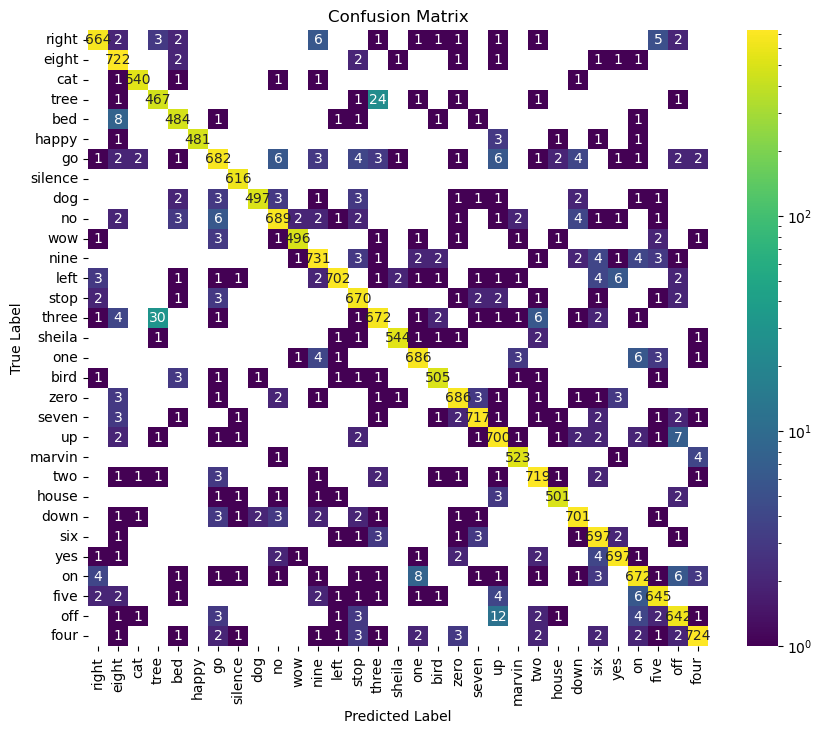

In [55]:
show_confusion_matrix(df)